In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow
import pandas as pd
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(x,y),(x_,y_) = mnist.load_data()
x=x/255.0

print (x.shape,y.shape)
print (x_.shape,y_.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
X_train = x.reshape(-1,28,28,1)
Y_train = np_utils.to_categorical(y)
print (X_train.shape,Y_train.shape)

(60000, 28, 28, 1) (60000, 10)


In [4]:
X_test = x_.reshape(-1,28,28,1)
Y_test = np_utils.to_categorical(y_)
print (X_test.shape,Y_test.shape)

(10000, 28, 28, 1) (10000, 10)


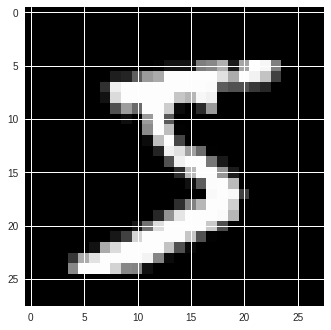

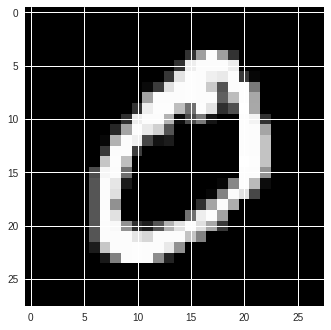

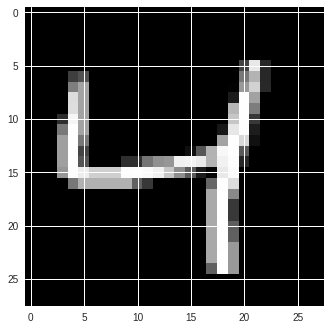

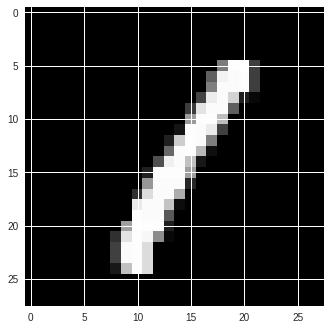

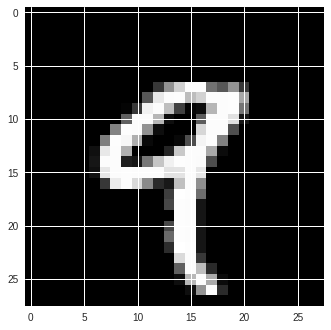

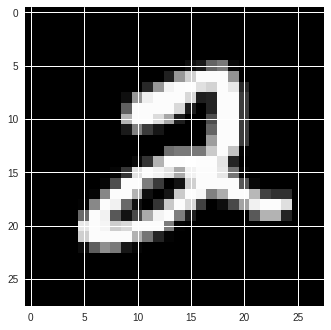

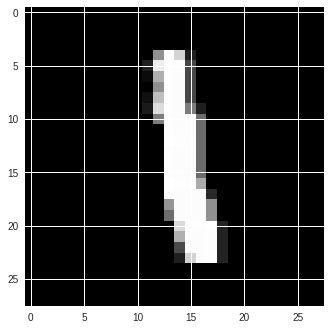

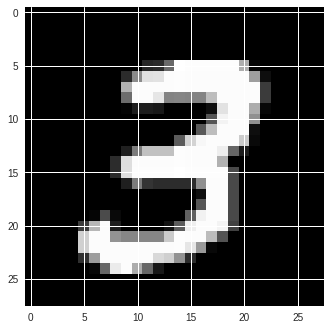

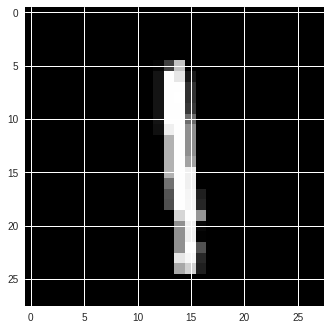

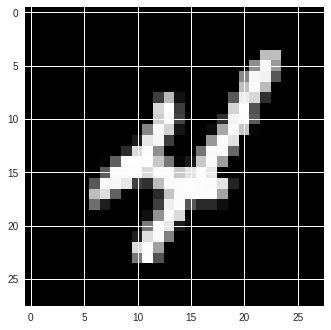

In [5]:
for ix in range(10):
    plt.figure(ix)
    x = X_train[ix].reshape(28,28)
    plt.imshow(x,cmap='gray')

In [6]:
model = Sequential()
model.add(Convolution2D(32,(3,3), activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Convolution2D(8,(5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
hist = model.fit(X_train,Y_train,epochs=10,shuffle=True,batch_size=256,validation_split=0.20)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 605s 13ms/step - loss: 0.4235 - acc: 0.8657 - val_loss: 0.1218 - val_acc: 0.9668
Epoch 2/10
48000/48000 [==============================] - 440s 9ms/step - loss: 0.0954 - acc: 0.9719 - val_loss: 0.0953 - val_acc: 0.9747
Epoch 3/10
48000/48000 [==============================] - 455s 9ms/step - loss: 0.0675 - acc: 0.9790 - val_loss: 0.0710 - val_acc: 0.9795
Epoch 4/10
48000/48000 [==============================] - 314s 7ms/step - loss: 0.0534 - acc: 0.9833 - val_loss: 0.0590 - val_acc: 0.9828
Epoch 5/10
48000/48000 [==============================] - 195s 4ms/step - loss: 0.0464 - acc: 0.9851 - val_loss: 0.0512 - val_acc: 0.9850
Epoch 6/10
48000/48000 [==============================] - 197s 4ms/step - loss: 0.0387 - acc: 0.9877 - val_loss: 0.0500 - val_acc: 0.9860
Epoch 7/10
48000/48000 [==============================] - 195s 4ms/step - loss: 0.0339 - acc: 0.9891 - val_loss: 0.0528 -

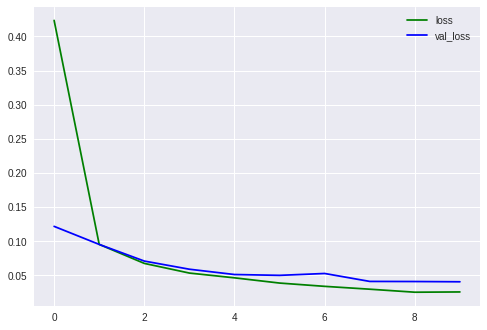

In [9]:
plt.figure(0)
plt.plot(hist.history['loss'],'g', label = 'loss')
plt.plot(hist.history['val_loss'],'b', label = 'val_loss')
plt.legend()
plt.show()

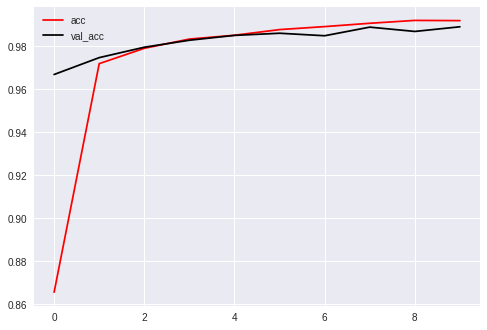

In [20]:
plt.figure(0)
plt.plot(hist.history['acc'],'r', label = 'acc')
plt.plot(hist.history['val_acc'],'black', label= 'val_acc')
plt.legend()
plt.show()

In [0]:
split = int(X_train.shape[0]*0.80)
x_train = X_train[:split]
y_train = Y_train[:split]
x_val = X_train[split:]
y_val = Y_train[split:]
x_test = X_test
y_test = Y_test

In [11]:
print (x_train.shape, x_val.shape, x_test.shape)
print (y_train.shape, y_val.shape, y_test.shape)

(48000, 28, 28, 1) (12000, 28, 28, 1) (10000, 28, 28, 1)
(48000, 10) (12000, 10) (10000, 10)


In [0]:
train_pred = model.predict(x_train)
val_pred = model.predict(x_val)
test_pred = model.predict(x_test)

In [13]:
print (train_pred.shape, val_pred.shape, test_pred.shape)

(48000, 10) (12000, 10) (10000, 10)


In [14]:
accuracy1 = 0
for i in range(y_train.shape[0]):
    if (train_pred[i].argmax() ==  y_train[i].argmax()):
        accuracy1 += 1

print (accuracy1)

47745


In [15]:
accuracy2 = 0
for i in range(y_val.shape[0]):
    if (val_pred[i].argmax() ==  y_val[i].argmax()):
        accuracy2 += 1

print (accuracy2)

11868


In [16]:
accuracy3 = 0
for i in range(y_test.shape[0]):
    if (test_pred[i].argmax() ==  y_test[i].argmax()):
        accuracy3 += 1

print (accuracy3)

9895


In [17]:
print ("Training Accuracy = ", accuracy1/float(y_train.shape[0]))
print ("Validation Accuracy = ", accuracy2/float(y_val.shape[0]))
print ("Testing Accuracy = ", accuracy3/float(y_test.shape[0]))


Training Accuracy =  0.9946875
Validation Accuracy =  0.989
Testing Accuracy =  0.9895


In [0]:
model.save("cnn_keras_manist_model.h5")

In [0]:
from google.colab import files
files.download("cnn_keras_manist_model.h5")